<a href="https://colab.research.google.com/github/steffiangel/Predictive-Analytics/blob/main/2348510_PA_LAB_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TCS STOCK PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:



df = pd.read_csv('/content/TCS1.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Open,8
High,8
Low,8
Close,8
Adj Close,8
Volume,8


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.fillna(method='ffill', inplace=True)

<ipython-input-11-340301f2732f>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
df.set_index('Date', inplace=True)


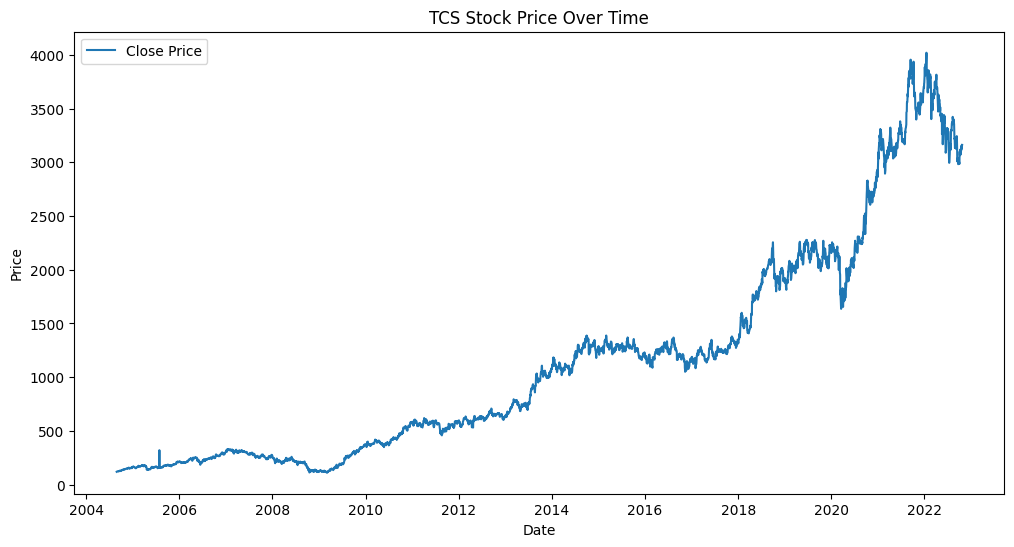

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('TCS Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


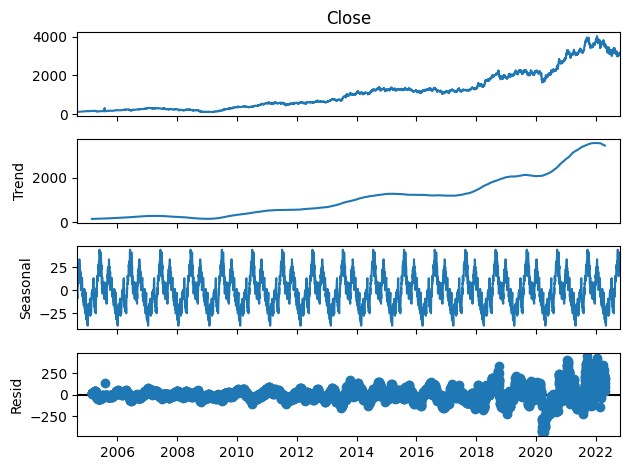

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='additive', period=252)  # Assuming daily data with ~252 trading days/year
result.plot()
plt.show()


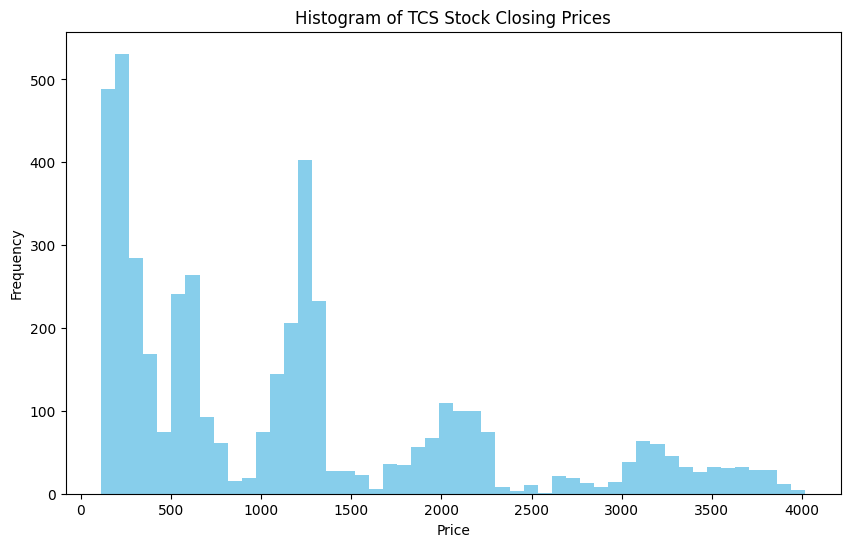

In [ ]:
df['Close'].plot(kind='hist', bins=50, figsize=(10, 6), color='skyblue')
plt.title('Histogram of TCS Stock Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


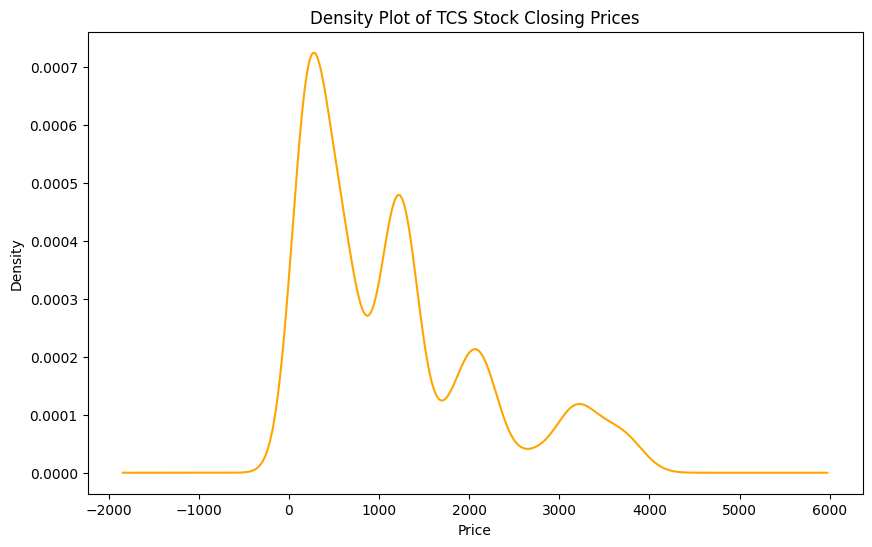

In [ ]:
df['Close'].plot(kind='kde', figsize=(10, 6), color='orange')
plt.title('Density Plot of TCS Stock Closing Prices')
plt.xlabel('Price')
plt.show()


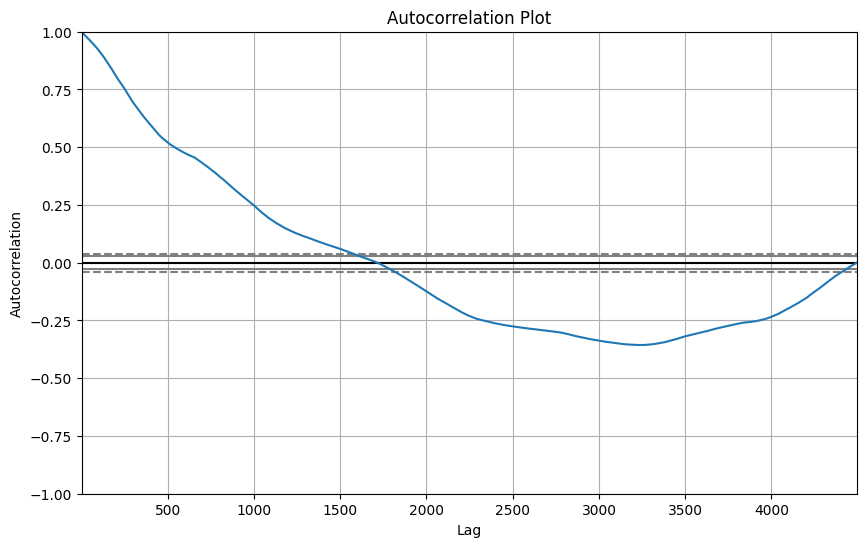

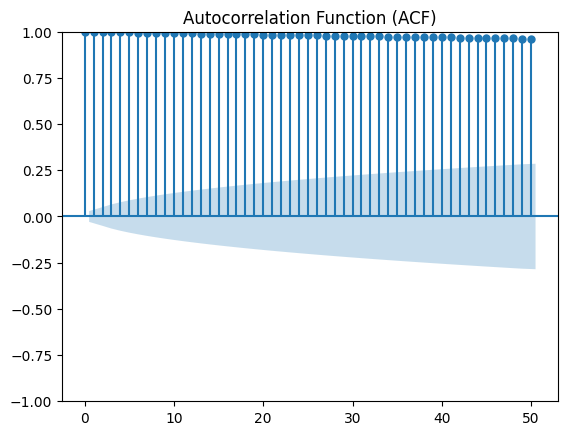

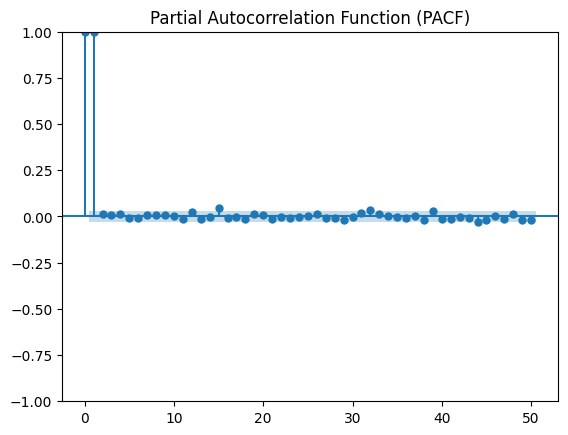

In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot')
plt.show()

plot_acf(df['Close'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df['Close'], lags=50)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


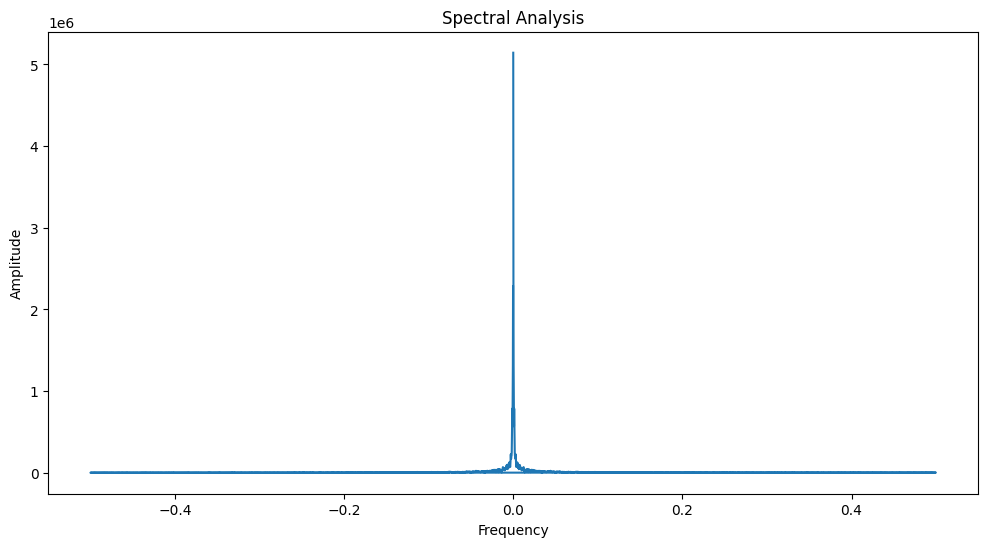

In [ ]:
import numpy as np

fft = np.fft.fft(df['Close'].dropna())
freq = np.fft.fftfreq(len(fft))

plt.figure(figsize=(12, 6))
plt.plot(freq, np.abs(fft))
plt.title('Spectral Analysis')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


<Figure size 1200x800 with 0 Axes>

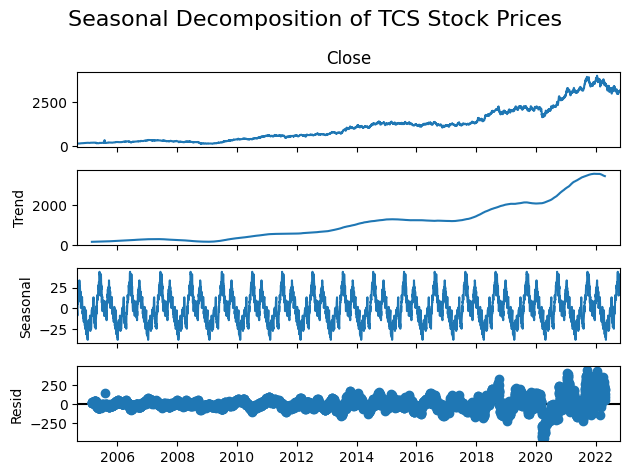

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(df['Close'], model='additive', period=252)

plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Seasonal Decomposition of TCS Stock Prices', fontsize=16)
plt.tight_layout()
plt.show()



<Figure size 1200x800 with 0 Axes>

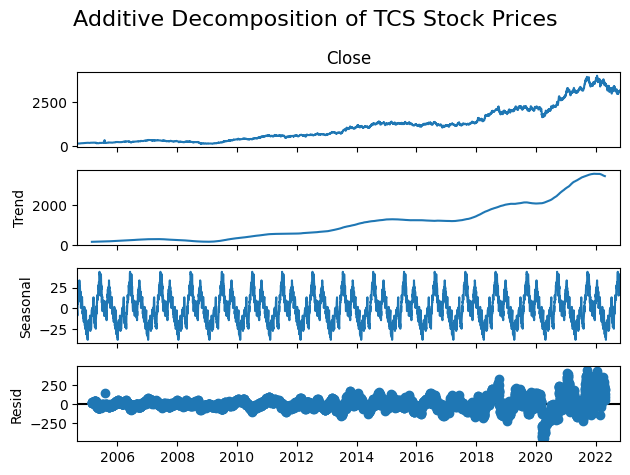

<Figure size 1200x800 with 0 Axes>

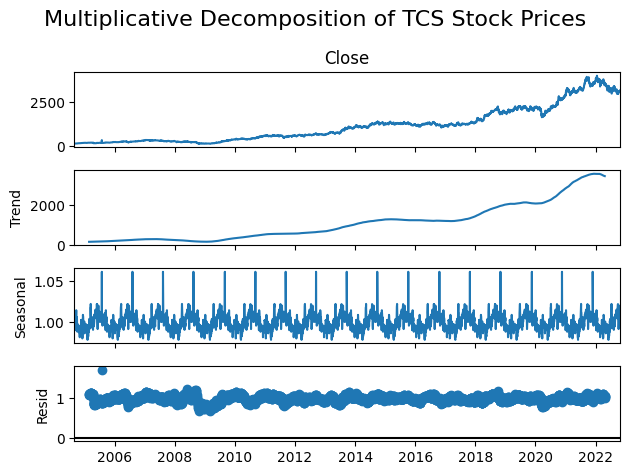

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


result_additive = seasonal_decompose(df['Close'], model='additive', period=252)  # Additive decomposition
result_multiplicative = seasonal_decompose(df['Close'], model='multiplicative', period=252)  # Multiplicative decomposition

# Plot Additive Decomposition
plt.figure(figsize=(12, 8))
result_additive.plot()
plt.suptitle('Additive Decomposition of TCS Stock Prices', fontsize=16)
plt.tight_layout()
plt.show()

# Plot Multiplicative Decomposition
plt.figure(figsize=(12, 8))
result_multiplicative.plot()
plt.suptitle('Multiplicative Decomposition of TCS Stock Prices', fontsize=16)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

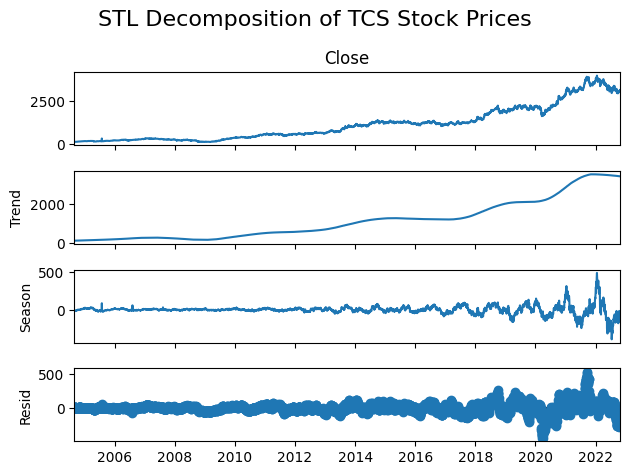

In [ ]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(df['Close'], period=252)
result_stl = stl.fit()

# Plot the results
plt.figure(figsize=(12, 8))
result_stl.plot()
plt.suptitle('STL Decomposition of TCS Stock Prices', fontsize=16)
plt.tight_layout()
plt.show()


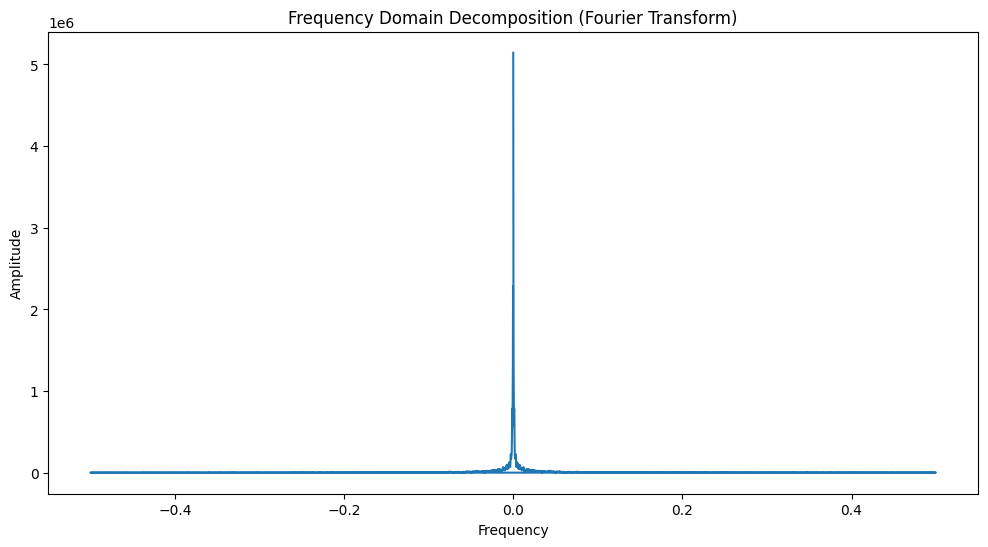

In [ ]:
import numpy as np

# Fourier Transform
fft = np.fft.fft(df['Close'].dropna())
freq = np.fft.fftfreq(len(fft))

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(freq, np.abs(fft))
plt.title('Frequency Domain Decomposition (Fourier Transform)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

clustering_features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
clustering_features.fillna(method='ffill', inplace=True)
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)


<ipython-input-24-b46965f2939e>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clustering_features.fillna(method='ffill', inplace=True)
<ipython-input-24-b46965f2939e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features.fillna(method='ffill', inplace=True)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_features_scaled)

df['Cluster'] = clusters


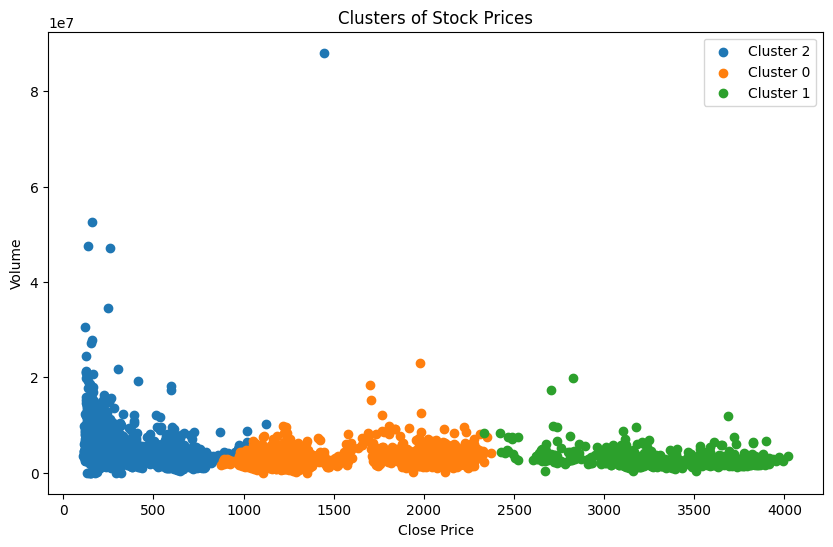

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    plt.scatter(
        df[df['Cluster'] == cluster]['Close'],
        df[df['Cluster'] == cluster]['Volume'],
        label=f'Cluster {cluster}'
    )
plt.title('Clusters of Stock Prices')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.legend()
plt.show()


In [ ]:
df['Target'] = (df['Close'] > df['Close'].mean()).astype(int)  # 1 if above mean, 0 otherwise


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Cluster']]
y = df['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 1.0
